<a href="https://colab.research.google.com/github/Mateuspv/Teste/blob/main/Atividade_Primeira_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática 1 - Dados de uma rede de Supermercados 


#<font color='red'>Crie um texto sobre o contexto dessa base de dados, detalhando cada coluna:</font>
### Contexto: Dados de vendas de três filiais com cerca de 1000 linhas, a coluna total significa o rendimento bruto....



>Dados de Vendas de três filiais com cerca de 1000 linhas de dados, e 15 colunas com dados para serem analisados, referente a 3 meses de dados, onde é visto a coluna total que representa o rendimento bruto do produto vendido em cada filial, os diferentes tipos de clientes que existem, e seu genero, as linhas de produtos que são mais vendidos, analisando o preço unitario e quantidade vendido de cada produto, alem dos tipos de pagamento mais utilizados, data com o mes que cada produto foi vendido, e a avalição mostrando o quanto os clientes acharam beneficos aqueles produtos, alem de serem descartadas as colunas porcentagem de margem bruta, renda bruta, ID da fatura, que vão ser utilizadas, alem da criação da coluna lucro sendo o Total - COGS

In [ ]:
import gdown #gdown é a biblioteca para baixar arquivos do drive

### Os dados se encontram nesse link:

Dados: https://docs.google.com/spreadsheets/d/1exmP2er4MvJ4yyaop3_yGhCYYmGb7s6A/edit?usp=share_link&ouid=110731142320700311054&rtpof=true&sd=true

#<font color='red'>Por que se utiliza "!" antes do comando gdown, para baixar a base?</font>


>Pois não está fazendo um comando do python, mas sim para um comando do computador/VM


In [ ]:
!gdown 1exmP2er4MvJ4yyaop3_yGhCYYmGb7s6A #Apenas o Hash do arquivo 

Downloading...
From: https://drive.google.com/uc?id=1exmP2er4MvJ4yyaop3_yGhCYYmGb7s6A
To: /content/SuperMercados.xlsx
100% 97.5k/97.5k [00:00<00:00, 87.2MB/s]


### Foi utilizado a biblioteca gdown para transferir do drive para a IDE Colab


#<font color='red'>Por que precisamos de bibliotecas no python?</font>
#<font color='red'>Coloque o link da documentação dessas bibliotecas para que serve (detalhadamente)</font>


##### Exemplo:
##### --> Numpy, é ....

> Para facilitarmos e agilizarmos o processo de análise, emprestando métodos e funções já existentes.

> Numpy, fornece suporte para arrays e matrizes multidimensionais, bem como funções matemáticas que operam nesses objetos. Documentação: https://numpy.org/doc/stable/.

> Pandas, utilizada para manipulação, limpeza e análise de dados. O Pandas é  útil para trabalhar com dados em diversas áreas. Documentação: https://pandas.pydata.org/docs/.

>Matplotlib, usada para criação de graficos e visualizações de dados em geral. Documentação: https://matplotlib.org/stable/

> seaborn, usada para criar os mais variaves tipos de graficos, e analise exploratorio de dados. Documentação:https://seaborn.pydata.org/tutorial/introduction


In [ ]:
import numpy as np  #Biblioteca responsável por operações matemáticas 
import pandas as pd # Biblioteca responsável pela manipulação de dados
import matplotlib.pyplot as plt # Biblioteca responsável pela visualização de dados
import seaborn as sns # Biblioteca de visualização de dados em alto nível 


In [ ]:
df = pd.read_excel('SuperMercados.xlsx') #Leitura dos dados para um dataframe (df)

In [ ]:
df.head() #Mostra apenas as cinco primeiras linhas do dataframe

,Unnamed: 0,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53


# Etapa: Limpeza e transformação da base de dados

#<font color='red'>Explique o comando abaixo, de qual biblioteca se trata?</font>

>O comando vem da biblioteca seaborn, serve para ver um mapa de calor dos dados que estão faltando ou corrompidos do banco de dados.

<Axes: >

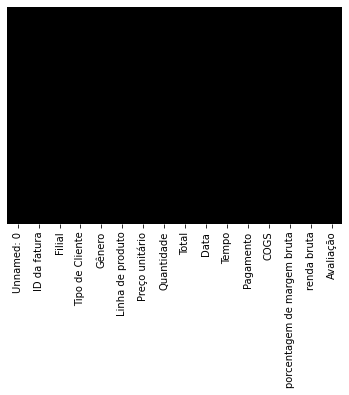

In [ ]:
sns.heatmap(df.isnull(),
            yticklabels = False,
            cbar = False,
            cmap = 'gnuplot') #Função do seaborn para visualizar dados que estejam faltando (NaN = Not a Number)

In [ ]:
df #Para verificar os dados

,Unnamed: 0,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Normal,M,Saúde e beleza,605.25,1,605.25,1/29/2019,13:46:00,PIX,363.1500,4761904762,20175,62
996,996,303-96-2227,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,3/2/2019,17:16:00,PIX,10224.9000,4761904762,4869,44
997,997,727-02-1313,A,Member,M,Comida e bebidas,477.60,1,477.60,2/9/2019,13:22:00,Dinheiro,405.9600,4761904762,1592,77
998,998,347-56-2442,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,2/22/2019,15:33:00,Dinheiro,691.1100,4761904762,3291,41


#<font color='red'>O que significa inplace?</font>

>O inplace no python serve para uma operação que modifica diretamente o objeto em que ela é aplicada,modificando diretamente o objeto de entrada, em vez de retornar uma cópia modificada.

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace = True) #Deletando a coluna "Unnamed: 0"

In [ ]:
df

,ID da fatura,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,porcentagem de margem bruta,renda bruta,Avaliação
0,750-67-8428,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,4761904762,261415,91
1,226-31-3081,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,4761904762,382,96
2,631-41-3108,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,4761904762,162155,74
3,123-19-1176,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,4761904762,23288,84
4,373-73-7910,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,4761904762,302085,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,M,Saúde e beleza,605.25,1,605.25,1/29/2019,13:46:00,PIX,363.1500,4761904762,20175,62
996,303-96-2227,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,3/2/2019,17:16:00,PIX,10224.9000,4761904762,4869,44
997,727-02-1313,A,Member,M,Comida e bebidas,477.60,1,477.60,2/9/2019,13:22:00,Dinheiro,405.9600,4761904762,1592,77
998,347-56-2442,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,2/22/2019,15:33:00,Dinheiro,691.1100,4761904762,3291,41


In [ ]:
df.drop(columns=['porcentagem de margem bruta', 'renda bruta', 'ID da fatura'], inplace = True) #Deletando as colunas que não vão ser usadas

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,Avaliação
0,A,Member,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,74
3,A,Member,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,53


In [ ]:
df.replace({'Tipo de Cliente' : {'Member' : 'Associado'}}, inplace = True) #Trocando o nome Member por Associado, na coluna Tipo de Cliente

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Tempo,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,53


In [ ]:
df.rename(columns={'Tempo':'Horário'}, inplace = True) #Trocando o nome da coluna Tempo por Horário

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,1/5/2019,13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,3/8/2019,10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,3/3/2019,13:23:00,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,1/27/2019,20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,2/8/2019,10:37:00,PIX,6796.9125,53


#<font color='red'>O que significa a função unique()?</font>

>A função unique serve para retornar apenas uma vezes cada dado da coluna, sem se repetir

In [ ]:
df['Data'].unique() #Verificando na coluna Data quais meses existem nesse caso apenas 1,2,3.

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [ ]:
df['Horário'] #Mostra apenas a coluna Horário

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Horário, Length: 1000, dtype: object

#<font color='red'>Por que precisamos converter para datatime64? O que significa isso?</font>

>Que a data está sendo um typo Objeto, e precisa ser a convertido para o tipo date para poder ser manipulado e usado para fazer o processamento dos dados.

In [ ]:
df['Data'] = pd.to_datetime(df['Data']) #Converte objeto para datatime64 (manipular data e hora)

In [ ]:
df['Data']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Data, Length: 1000, dtype: datetime64[ns]

In [ ]:
df['Horário'] = pd.to_datetime(df['Horário']) #Converte objeto para datatime64 (manipular data e hora)

In [ ]:
df['Horário']

0     2023-03-26 13:08:00
1     2023-03-26 10:29:00
2     2023-03-26 13:23:00
3     2023-03-26 20:33:00
4     2023-03-26 10:37:00
              ...        
995   2023-03-26 13:46:00
996   2023-03-26 17:16:00
997   2023-03-26 13:22:00
998   2023-03-26 15:33:00
999   2023-03-26 13:28:00
Name: Horário, Length: 1000, dtype: datetime64[ns]

#IMPORTANTE: Esse comando foi atrasado, deveria ter sido executado no começo para verificar se algum dado está repetido.

#<font color='red'>Por que esse comando é importante quando se trata de KDD?</font>

>Por que ele mostra se existem dados duplicados na base , por que é necessario limpar eles

In [ ]:
df.duplicated().sum() 

0

In [ ]:
df.dtypes # comando para analisar os tipos de dados no seu dataframe

Filial                      object
Tipo de Cliente             object
Gênero                      object
Linha de produto            object
Preço unitário             float64
Quantidade                   int64
Total                      float64
Data                datetime64[ns]
Horário             datetime64[ns]
Pagamento                   object
COGS                       float64
Avaliação                    int64
dtype: object

#<font color='red'>O que é dicionário em python, para que serve?</font>

>Em Python, um dicionário é um tipo de estrutura de dados que permite armazenar pares de chave-valor. Cada chave é única e usada para acessar um valor associado a ela. Os valores em um dicionário podem ser de qualquer tipo, incluindo outros dicionários

In [ ]:
meses = {1: 'Janeiro', 2:'Fevereiro', 3: 'Março'} # Criando um dicionário 

#<font color='red'>Explique a função dt.month.map(meses)?</font>

>A função do proprio python, serve para poder mudar os numeros de cada mes para a string com o nome de cada mes, no mapa que foi criado anteriormente.

In [ ]:
df['Data'] = pd.to_datetime(df['Data']).dt.month.map(meses) #Mapear o número mês para string mês

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,2023-03-26 13:08:00,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,2023-03-26 10:29:00,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,2023-03-26 13:23:00,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,2023-03-26 20:33:00,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,2023-03-26 10:37:00,PIX,6796.9125,53


# <font color='red'>Explique a função dt.strftime, por que precisamos mudar o objeto?</font>

>A função serve para formatar os campos de Horário para apenas mostrarem o Horario que foi feito a compra, e necessario mudar o objeto para parar poder manipular de forma que seja possivel apenas mostrar a Hora.

In [ ]:
df['Horário'] = df['Horário'].dt.strftime('%H') #Transformar datatime em object (string), selecionado apenas o horário.

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,13,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,10,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,13,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,20,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,10,PIX,6796.9125,53


#<font color='red'>Explique detalhadamente o bloco de código abaixo:</font>

>Primeira é criado uma lista vazia, após feito um loop para passar linha por linha da coluna horario, verificando se o horario é de maior que 8 e menor que 13 é nomeado de manha, se maior que 12 e menor que 19 nomea Tarde, se for diferente disso é nomeado Noite, e feito a substituição da coluna pela lista feita.

In [ ]:
time = [] #lista vazia
for i in list(map(int,df['Horário'])): #laço for mapeando e transformando string para inteiro
    if i > 8 and i < 13: # 9 - 12 (manhã)
      time.append('Manhã') # Comando Append vai inserir Manhã quando o critério for verdadeiro na lista time.
    elif i > 12 and i < 19: 
      time.append('Tarde')
    else:
      time.append('Noite')
df['Horário'] = time #Substituindo a coluna horário pela lista time

In [ ]:
df.head() #Dados OK

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


#<font color='red'>Explique de maneira resumida o que foi feito:</font>



1.   Foi excluído algumas colunas que não tinham correlação
2.   Item da lista



>Foram feito a exclusão das colunas 'porcentagem de margem bruta', 'renda bruta', 'ID da fatura', e alterado o nome membro para associado na coluna Tipo de Cliente, alem de alterado a Coluna Data de 1,2,3 para Janeiro, fevereiro, março, e Alterado o Horario de numero para Manha, Tarde, Noite

# Etapa: Minerando Dados criando Informação e Conhecimento

# **1 Análise**


#<font color='red'>O que significa a função abaixo? Por que linha de produto está entre parênteses e Avaliação entre colchetes?</font>


>Está griando um agrupamento  da coluna linha de produto e avaliação, A linha de produto está entre parenteses por que ela é está sendo defenido como uma coluna independente, e avaliação que está logo após de linha de produto, está entre colchetes para dizer que é dependente de linha de produto.

In [ ]:
Agrupamento = df.groupby('Linha de produto')['Avaliação'].mean().reset_index(drop=False) 

In [ ]:
Agrupamento

,Linha de produto,Avaliação
0,Acessórios eletrônicos,61.411765
1,Acessórios fashions,64.780899
2,Casa e estilo de vida,63.031250
3,Comida e bebidas,63.166667
4,Esportes e viagens,60.379518
5,Saúde e beleza,62.335526


In [ ]:
Agrupando_avaliação = Agrupamento.round(1) #Apenas arredondando para uma casa decimal

In [ ]:
Agrupando_avaliação

,Linha de produto,Avaliação
0,Acessórios eletrônicos,61.4
1,Acessórios fashions,64.8
2,Casa e estilo de vida,63.0
3,Comida e bebidas,63.2
4,Esportes e viagens,60.4
5,Saúde e beleza,62.3


#<font color='red'>Por que ascending está falso?</font>


> O ascending está falso para mostrar os valores na ordem decrescente do maior para o menor, se ele estivesse true mostraria os valores na ordem crescente.



In [ ]:
Agrupando_avaliação = Agrupando_avaliação.sort_values(by = 'Avaliação', ascending = False) #Classicando valores na ordem decrescente (maior para menor)

In [ ]:
Agrupando_avaliação

,Linha de produto,Avaliação
1,Acessórios fashions,64.8
3,Comida e bebidas,63.2
2,Casa e estilo de vida,63.0
5,Saúde e beleza,62.3
0,Acessórios eletrônicos,61.4
4,Esportes e viagens,60.4


In [ ]:
Figura = sns.color_palette('gnuplot') #Apenas selecionado as cores do gráfico
Figura.reverse() #Apenas invertendo a sequência de cores

#<font color='red'>Explique de maneira resumida o que foi feito:</font>


>Foi criado um grafico de barras e configurado seu tamanho e cores para transformar os valores de Agrupando_avaliação em grafico

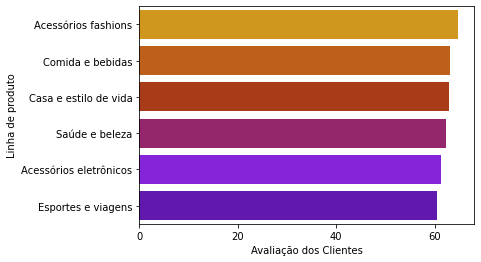

In [ ]:
ax = sns.barplot(y = 'Linha de produto', x = 'Avaliação', data = Agrupando_avaliação, palette = Figura)
plt.rcParams['figure.figsize'] = (18, 10) #Aumentar o tamanho da Figura
ax.set_xlabel('Avaliação dos Clientes')
plt.rcParams.update({"font.size": 18}) #Aumentar a letra
plt.savefig('Linha_x_avaliacao.png', dpi=300)

#<font color='red'>Qual é a linha de produto mais bem avaliada? Levante hipótese sobre esse resultado?</font>


> a linha de produto mais bem avalidada é a Acessórios fashions, um dos motivos que podem levar isso é a qualidade dos Acessórios de fashuins são amis custo beneficio que as outras linhas de produtos.

# **2 Análise**

#<font color='red'>O faz a função abaixo?</font>


>Ela calcula a media da coluna total para cada linha da coluna linha de produto

In [ ]:
agrupando_Produto_Total = df.groupby('Linha de produto')['Total'].mean().reset_index(drop=False) # Agrupando a coluna linha de produto e Total

In [ ]:
agrupando_Produto_Total

,Linha de produto,Total
0,Acessórios eletrônicos,4278.573529
1,Acessórios fashions,4043.292135
2,Casa e estilo de vida,4455.973125
3,Comida e bebidas,3912.985345
4,Esportes e viagens,4351.833434
5,Saúde e beleza,4024.018421


In [ ]:
agrupando_Produto_Total = agrupando_Produto_Total.round(1) # arredondamento para uma casa decimal

#<font color='red'>Mude o gráfico abaixo para barras</font>


>fig, ax = plt.subplots(figsize=(16,12))
ax = sns.scatterplot(x = 'Linha de produto', y = 'Total', data = agrupando_Produto_Total, s = 75) # tipo do gráfico scatter com tamanho dos pontos 75
plt.axhline(y=np.nanmean(df.Total), color='red', linestyle='--', linewidth=3, label='Média') #Média linha vermelha
plt.xticks(rotation = 45) # Colocar a legenda em 45 graus.
>#Para transformar esse cogio em um grafico de barras foi necessario alterar o codigo sns.scatterplot para sns.barplot e alterar o s = 75 para palette = Figura

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Acessórios eletrônicos'),
  Text(1, 0, 'Acessórios fashions'),
  Text(2, 0, 'Casa e estilo de vida'),
  Text(3, 0, 'Comida e bebidas'),
  Text(4, 0, 'Esportes e viagens'),
  Text(5, 0, 'Saúde e beleza')])

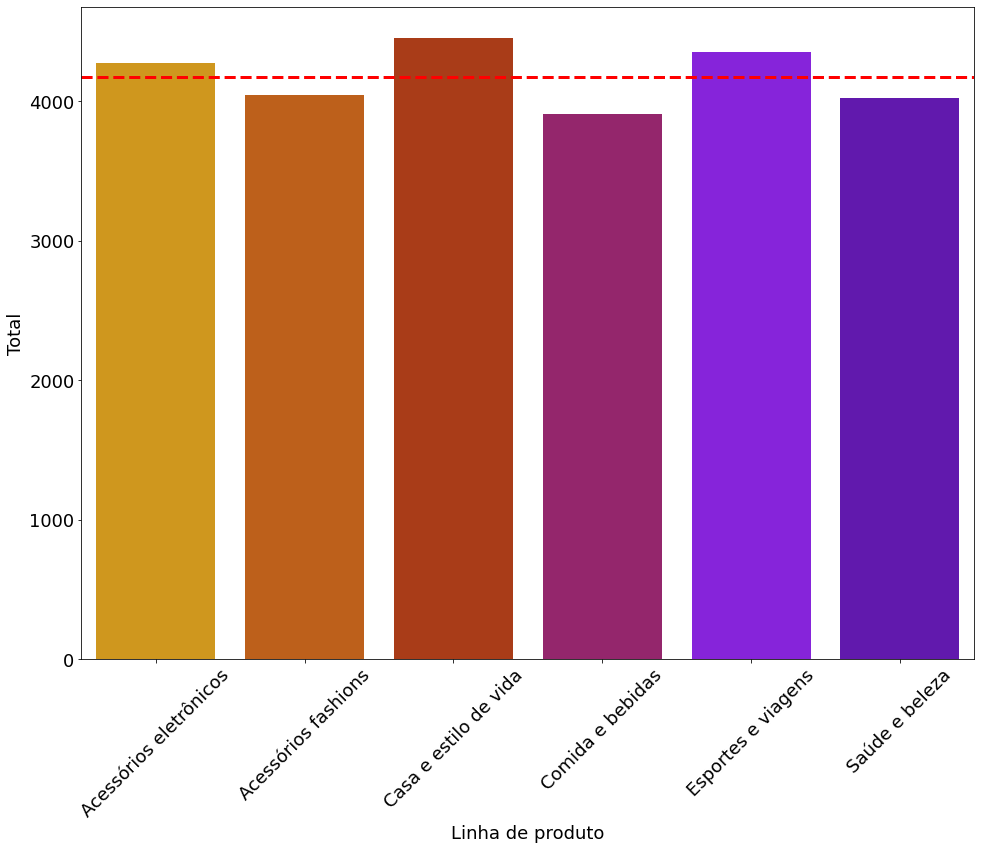

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x = 'Linha de produto', y = 'Total', data = agrupando_Produto_Total, palette = Figura) # tipo do gráfico scatter com tamanho dos pontos 75
plt.axhline(y=np.nanmean(df.Total), color='red', linestyle='--', linewidth=3, label='Média') #Média linha vermelha
plt.xticks(rotation = 45) # Colocar a legenda em 45 graus

#<font color='red'>Explique o gráfico acima</font>


>O grafico mostra a media dos valorees da coluna total, para cada linha de produto, com a linha vermelha mostrando a media dos valores da coluna total

# **3 Análise**

#<font color='red'> Qual é a filial que tem a maior média de vendas (valor bruto)</font>

>Casa e estilo de vida

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


#<font color='red'>Explique a função abaixo</font>


>Ela calcula a media da coluna total para cada linha da coluna Filial

In [ ]:
agrupando_Filial_Total = df.groupby('Filial')['Total'].mean().reset_index(drop=False) 

In [ ]:
agrupando_Filial_Total 

,Filial,Total
0,A,4110.275294
1,B,4179.079066
2,C,4237.762043


#<font color='red'>Mude para gráfico de barras</font>


> Mesma logica usada anteriormente

(array([0, 1, 2]), [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')])

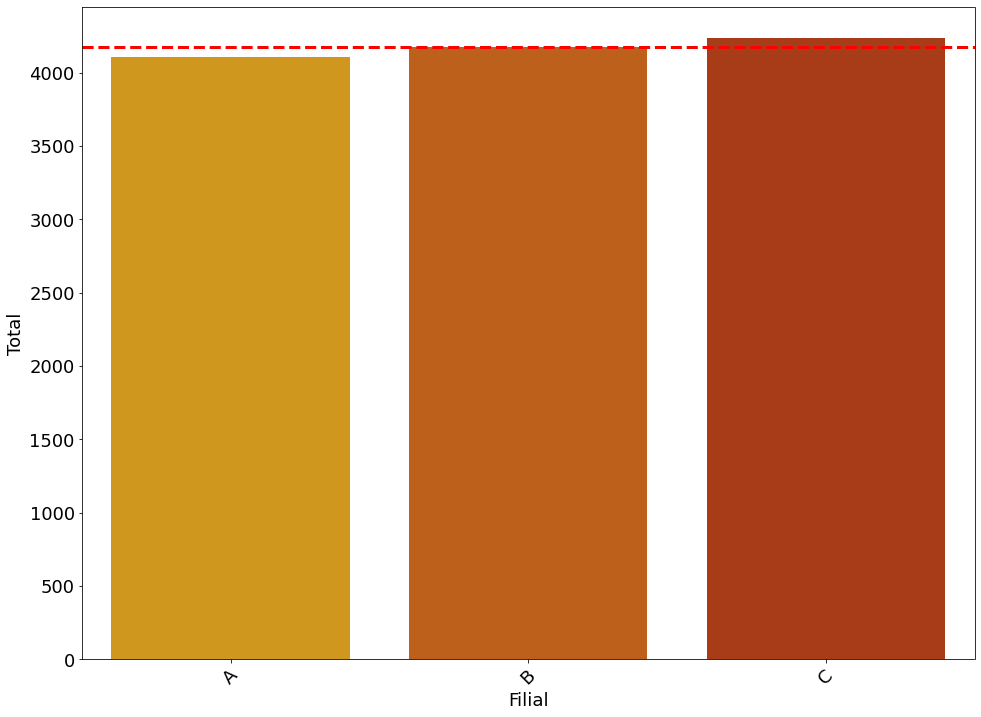

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x = 'Filial', y = 'Total', data = agrupando_Filial_Total , palette = Figura)
plt.axhline(y=np.nanmean(df.Total), color='red', linestyle='--', linewidth=3, label='Média')
plt.xticks(rotation = 45)

#<font color='red'>Explique o gráfico acima</font>


O grafico mostra a media dos valorees da coluna total, para cada filial, com a linha vermelha mostrando a media dos valores da coluna total

# **4 Análise**

# <font color='red'>Explique o gráfico a seguir, o que significa?</font>


> O grafico mostra a quantidade de produtos levados da mesma linha de produto,onde maior o grafico significa que ouve mais pessoas comprando essa mesma quantidade

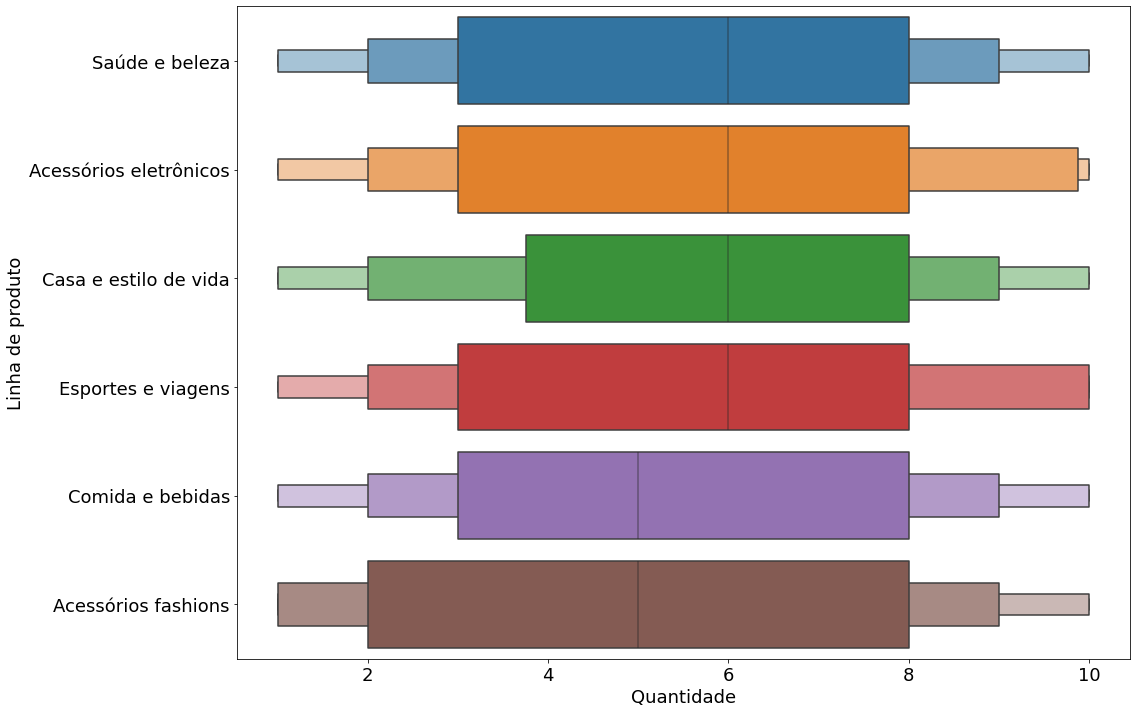

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.boxenplot(y='Linha de produto', x = 'Quantidade', data=df) #Cálculo da distribuição da quantidade em relação a linha de produto

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


# **5 Análise**

# <font color='red'>Por que 'Quantidade' está acompanhado sum()?</font>



>É usado para somar os valores da quantidade para cada grupo de data, calculando seu total de produto vendidos por data

In [ ]:
Agrupando_Data_Quantidade = df.groupby('Data')['Quantidade'].sum().reset_index(drop=False)

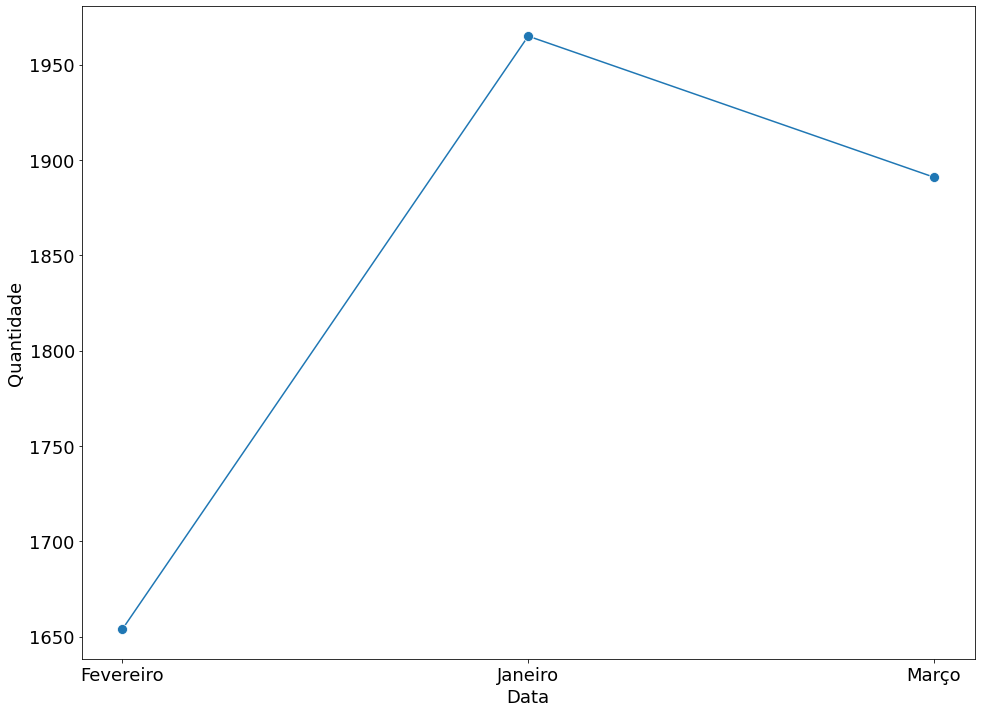

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.lineplot(x = 'Data', y ='Quantidade', data = Agrupando_Data_Quantidade, marker='o', markersize=10)

# <font color='red'>Explique o gráfico acima, o que significa?</font>


> O grafico acima significa que a quantidade vendida em fevereiro foi a menor de todas, janeiro foi o mes que mais vendeu, e março ficou no meio na quantidade de vendas

In [ ]:
Agrupando_Data_Quantidade

,Data,Quantidade
0,Fevereiro,1654
1,Janeiro,1965
2,Março,1891


In [ ]:
new_index = [1,0,2] #Alterando a ordem dos meses

In [ ]:
Agrupando_Data_Quantidade = Agrupando_Data_Quantidade.reindex(new_index) # salvando

# <font color='red'>Explique o código acima:</font>


> Foi feito a reodenação da Data, para que fique Janeiro,Fevereiro, Març, e salvado na função

In [ ]:
df.head()

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53


# **6 Análise**

# <font color='red'>Explique detalhamente o código abaixo:</font>


>Primeiro é definido o estilo classico,e a paleta de cores do grafico. Apos isso é feito um agrupamento da coluna Tipo de cliente retornando o numero de ocorrencia para cada categoria de total, apos isso é feito a montagem do grafico, definindo que sera um grafico de pizza, com uma desimal,seu tamanho, se deve ser criado com subplots separados, e a largura de cada "fatia"

array([<Axes: ylabel='Total'>], dtype=object)

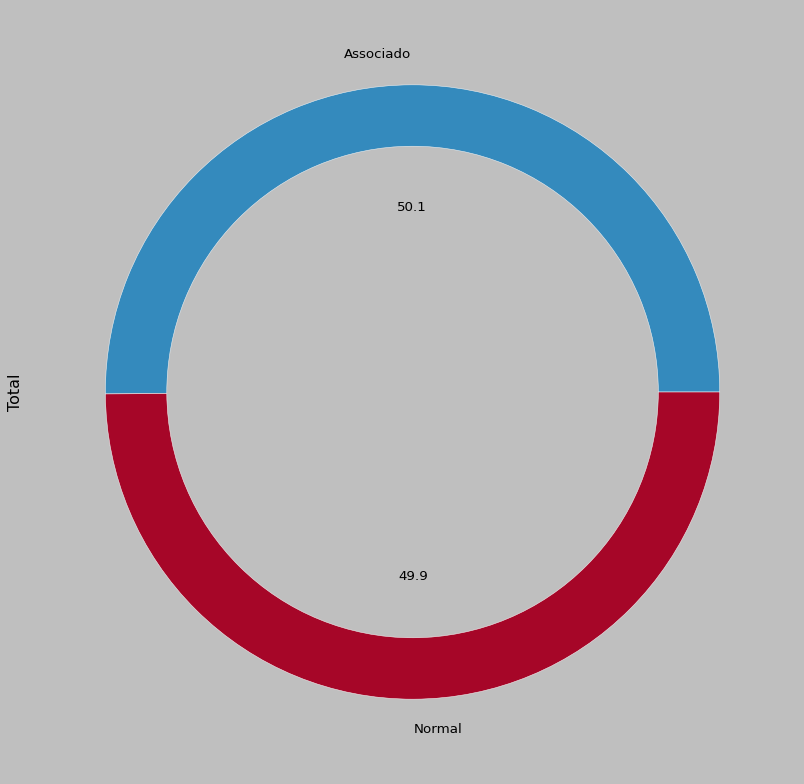

In [ ]:
plt.style.use('classic') #Gráfico Clássico
plt.style.use('bmh') #estilo cores
df.groupby('Tipo de Cliente').count()['Total'].plot(kind='pie', autopct='%.1f', figsize=(16,12), subplots=True, wedgeprops=dict(width=0.20))

In [ ]:
df.groupby('Tipo de Cliente').count()['Total']

Tipo de Cliente
Associado    501
Normal       499
Name: Total, dtype: int64

# <font color='red'>Está coerente o gráfico acima?</font>


Sim, os dados apresentados fazem sentido ao olhar o grafico feito

# **7 Análise**

# <font color='red'>Explique o código abaixo:</font>






>O codigo abaixo é o mesmo utilizado anteriormente a unica diferenta em que inves da coluna tipo de cliente está sendo utlizado a coluna pagamento retornar o numero de ocorrencias para cada categoria de total.

array([<Axes: ylabel='Total'>], dtype=object)

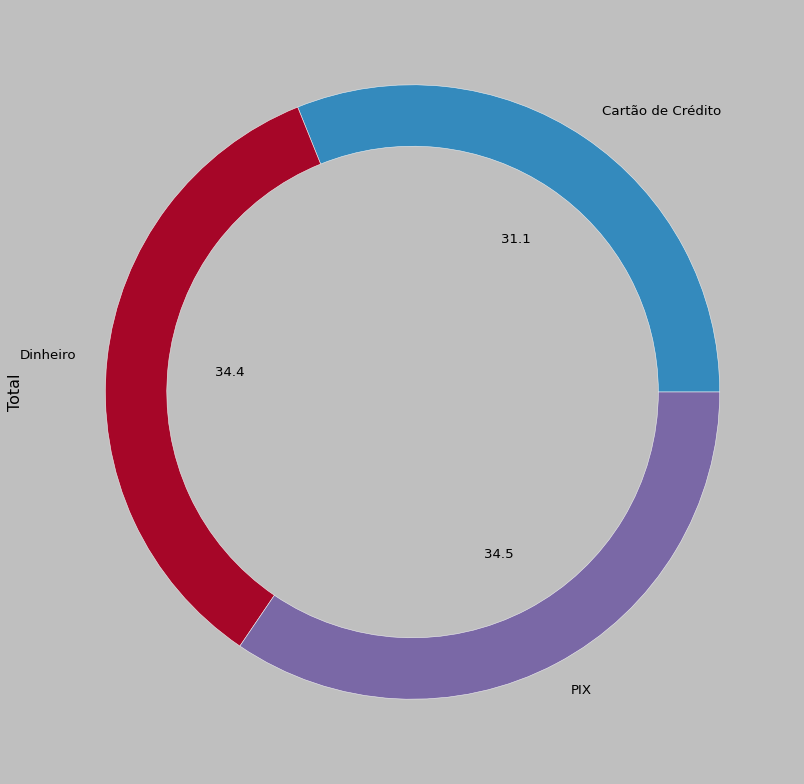

In [ ]:
plt.style.use('classic')
plt.style.use('bmh')
df.groupby('Pagamento').count()['Total'].plot(kind='pie', autopct='%.1f', figsize=(16,12), subplots=True, wedgeprops=dict(width=0.20))

# <font color='red'>O que significa o gráfico acima? Monte uma hipótese para esse resultado?</font>


> O grafico acima significa que o metodo mais utilizado de pagamento é o pix, apos o dinheiro, e cartão respectivamente, uma hipótese para isso vem da facilidade de usar o pix, e pelo costume de usar o dinheiro, o cartão está em utilmo deve se dar pelo fato de entre usar o cartão ou o pix as pessoas optão pelo pix que é mais facil.

# **8 Análise**

# <font color='red'>Explique o código a seguir?</font>


> Codigo já usado anteriormente que  calcula a media da coluna total para cada linha da coluna Horário

In [ ]:
agrupamento_horario_total = df.groupby('Horário')['Total'].mean().reset_index(drop=False)

In [ ]:
agrupamento_horario_total

,Horário,Total
0,Manhã,4077.974464
1,Noite,4196.399202
2,Tarde,4218.379511


<Axes: xlabel='Horário', ylabel='Total'>

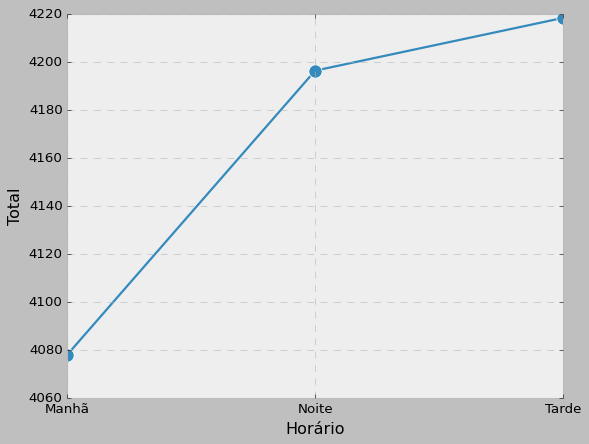

In [ ]:
sns.lineplot(x = 'Horário', y = 'Total', data = agrupamento_horario_total, marker='o', markersize=12, linewidth=2)

# <font color='red'>Qual sua hipótese em relação ao gráfico acima:</font>


Como não se sabe o hórario que as filiais são aberta e fechadas, mas uma hipotese para isso é que a maior parte das pessoas saem para fazer compras no perio da tarde, e levando em conta o horario normal de trabalho, tambem fazem mais compras ao sair do trabalho, ao inves de acordar mais cedo para fazer as compras

# 9 Análise

In [ ]:
df['Lucro'] = df['Total'] - df['COGS']

In [ ]:
df

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Avaliação,Lucro
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,91,3136.9800
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,96,114.6000
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,74,1459.3950
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,84,2794.5600
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,53,2265.6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,M,Saúde e beleza,605.25,1,605.25,Janeiro,Tarde,PIX,363.1500,62,242.1000
996,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,Março,Tarde,PIX,10224.9000,44,4382.1000
997,A,Associado,M,Comida e bebidas,477.60,1,477.60,Fevereiro,Tarde,Dinheiro,405.9600,77,71.6400
998,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,Fevereiro,Tarde,Dinheiro,691.1100,41,296.1900


# <font color='red'>Reorganize a coluna Lucro antes de Avaliação?</font>


In [ ]:
df = df[['Filial', 'Tipo de Cliente', 'Gênero', 'Linha de produto', 'Preço unitário', 'Quantidade', 'Total', 'Data', 'Horário', 'Pagamento', 'COGS', 'Lucro', 'Avaliação']]

In [ ]:
df

,Filial,Tipo de Cliente,Gênero,Linha de produto,Preço unitário,Quantidade,Total,Data,Horário,Pagamento,COGS,Lucro,Avaliação
0,A,Associado,F,Saúde e beleza,1120.35,7,7842.45,Janeiro,Tarde,PIX,4705.4700,3136.9800,91
1,C,Normal,F,Acessórios eletrônicos,229.20,5,1146.00,Março,Manhã,Dinheiro,1031.4000,114.6000,96
2,A,Normal,M,Casa e estilo de vida,694.95,7,4864.65,Março,Tarde,Cartão de Crédito,3405.2550,1459.3950,74
3,A,Associado,M,Saúde e beleza,873.30,8,6986.40,Janeiro,Noite,PIX,4191.8400,2794.5600,84
4,A,Normal,M,Esportes e viagens,1294.65,7,9062.55,Fevereiro,Manhã,PIX,6796.9125,2265.6375,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Normal,M,Saúde e beleza,605.25,1,605.25,Janeiro,Tarde,PIX,363.1500,242.1000,62
996,B,Normal,F,Casa e estilo de vida,1460.70,10,14607.00,Março,Tarde,PIX,10224.9000,4382.1000,44
997,A,Associado,M,Comida e bebidas,477.60,1,477.60,Fevereiro,Tarde,Dinheiro,405.9600,71.6400,77
998,A,Normal,M,Casa e estilo de vida,987.30,1,987.30,Fevereiro,Tarde,Dinheiro,691.1100,296.1900,41


# <font color='red'>Qual linha de produto da mais lucro?</font>


In [ ]:
agrupamento_Linha_lucro = df.groupby('Linha de produto')['Lucro'].mean().reset_index(drop=False)

In [ ]:
agrupamento_Linha_lucro

,Linha de produto,Lucro
0,Acessórios eletrônicos,427.857353
1,Acessórios fashions,1010.823034
2,Casa e estilo de vida,1336.791938
3,Comida e bebidas,586.947802
4,Esportes e viagens,1087.958358
5,Saúde e beleza,1609.607368


In [ ]:
agrupamento_Linha_lucro = agrupamento_Linha_lucro.round(1)

In [ ]:
agrupamento_Linha_lucro

,Linha de produto,Lucro
0,Acessórios eletrônicos,427.9
1,Acessórios fashions,1010.8
2,Casa e estilo de vida,1336.8
3,Comida e bebidas,586.9
4,Esportes e viagens,1088.0
5,Saúde e beleza,1609.6


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Acessórios eletrônicos'),
  Text(1, 0, 'Acessórios fashions'),
  Text(2, 0, 'Casa e estilo de vida'),
  Text(3, 0, 'Comida e bebidas'),
  Text(4, 0, 'Esportes e viagens'),
  Text(5, 0, 'Saúde e beleza')])

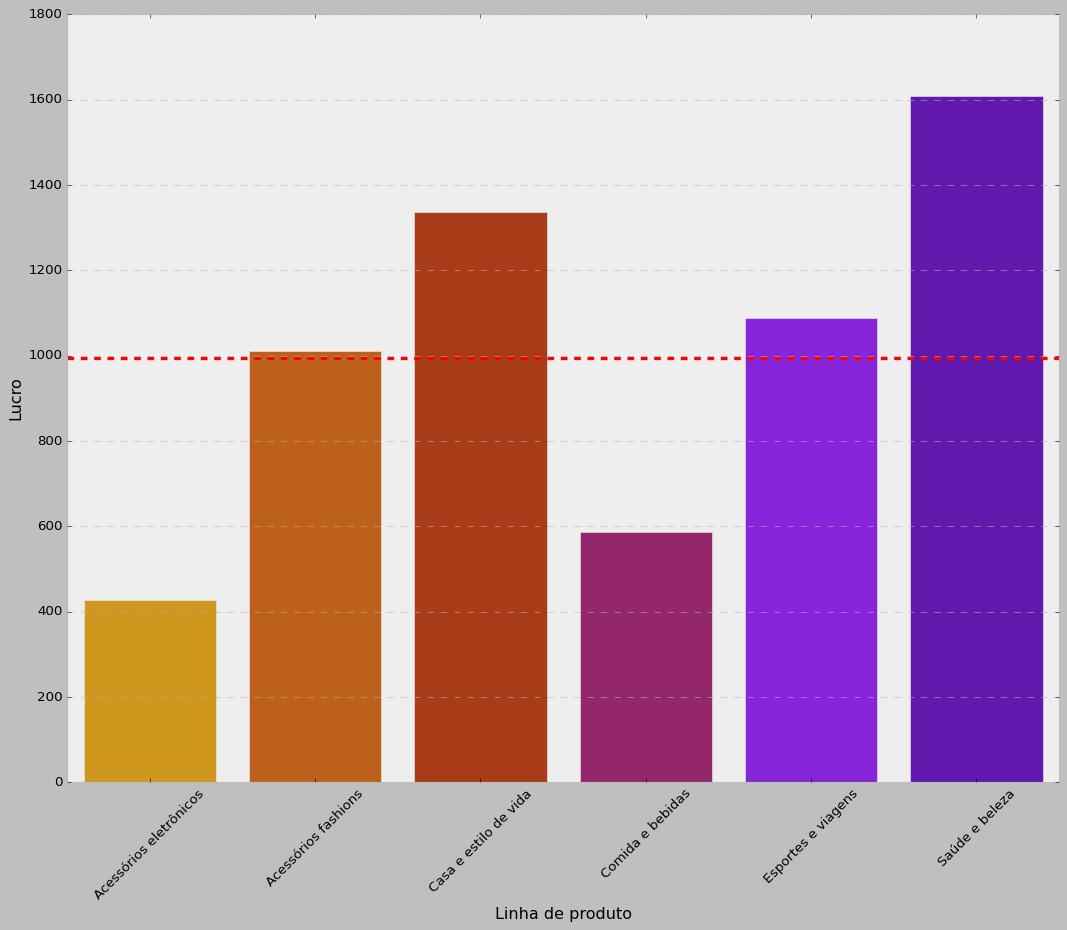

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.barplot(x = 'Linha de produto', y = 'Lucro', data = agrupamento_Linha_lucro , palette = Figura)
plt.axhline(y=np.nanmean(df.Lucro), color='red', linestyle='--', linewidth=3, label='Média')
plt.xticks(rotation = 45)

> A linha de produto que mais está dando lucro é Saúde e beleza